In [1]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [2]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [3]:
# Deep Learning Frameworkから必要なモジュールの読み込み
import tensorflow as tf
print(tf.__version__)
%load_ext tensorboard

from tensorflow import keras
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import clone_model

2.3.0


# 通常の機械学習の実装

## データの準備

In [4]:
#学習経過描画用関数
import matplotlib.pyplot as plt
%matplotlib inline

def plot_training(result):
  epochs = len(result.history['loss'])
  plt.plot(range(1, epochs+1), result.history['loss'], label="training")
  plt.plot(range(1, epochs+1), result.history['val_loss'], label="validation")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

#画像表示用
from tensorflow.keras.preprocessing.image import array_to_img
from IPython.display import display_png

cifar10_labels = np.array([
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'])

import datetime

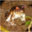

[6]


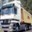

[9]


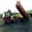

[9]


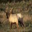

[4]


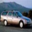

[1]


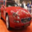

[1]


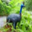

[2]


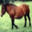

[7]


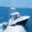

[8]


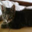

[3]


In [5]:
if 1:
  #CIFAR10　データセットの読み込み
  (Xtrain, Ytrain), (Xtest, Ytest) = cifar10.load_data()

  #正規化(値を0-1の範囲にスケール)
  Xtrain = Xtrain/ 255.
  Xtest = Xtest/ 255.

else:
  # MNISTデータの読み込み
  (Xtrain, Ytrain), (Xtest, Ytest) = mnist.load_data()

  #正規化
  Xtrain = np.expand_dims(Xtrain, 3) / 255.
  Xtest = np.expand_dims(Xtest, 3) / 255.

#サンプルの表示
for i in range(0,10):
  display_png(array_to_img(Xtrain[i]))
  print(Ytrain[i])

#ラベルをカテゴリデータに変換
Ytrain = to_categorical(Ytrain)
Ytest = to_categorical(Ytest)

in_shape = Xtrain.shape[1:]
out_dims = Ytrain.shape[-1]

In [6]:
print(Ytrain[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## モデルの定義

In [7]:
# Modelの定義
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Input, BatchNormalization, Dropout, Activation
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
  
def MLP(in_shape, out_dims):
    x = Input(shape=(in_shape[0], in_shape[1], in_shape[2]))
    y = Flatten()(x)
    #　ユニット数64のDense layer
    y = Dense(512)(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = Dense(256)(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
 #Activationはレイヤ関数の引数でも指定できる。レイヤとして追加される。
    y = Dense(out_dims, activation='softmax')(y)
    model = Model(x, y)
    model.compile(optimizer=SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])  
    return model

"""
各種レイヤーの記法
Batch Normalization
  y = BatchNormalization()(y)
  
Dropout
  y = Dropout(rate=0.3)(y)

Convolution フィルタ枚数16, フィルタサイズ(3,3), 元画像と同じサイズになるようにpaddingする場合
  y = Conv2D(16, (3, 3), padding='same')(y)
  
Pooling
  y = MaxPool2D()(x)
  
テンソル→ベクトルの変換
  y = Flatten()(y)
"""
  
# 小さいCNN, 10k parameters
def tiny_cnn(in_shape, out_dims):
    x = Input(shape=(in_shape[0], in_shape[1], in_shape[2]))
    y = Conv2D(16, (3, 3))(x)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = MaxPool2D()(y)
    y = Conv2D(8, (3, 3))(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = Flatten()(y)
    y = Dense(out_dims, activation='softmax')(y)
    model = Model(x, y)
    model.compile(optimizer=SGD(learning_rate=0.05), loss='categorical_crossentropy', metrics=['accuracy'])  

    return model

# 60k parameters
def small_cnn(in_shape, out_dims):
    x = Input(shape=(in_shape[0], in_shape[1], in_shape[2]))
    y = Conv2D(64, (3, 3))(x)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = MaxPool2D()(y)
    y = Conv2D(64, (3, 3))(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = Conv2D(32, (3, 3))(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = MaxPool2D()(y)
    y = Conv2D(32, (3, 3))(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = Flatten()(y)
    y = Dense(out_dims, activation='softmax')(y)
    model = Model(x, y)
    model.compile(optimizer=SGD(learning_rate=0.05), loss='categorical_crossentropy', metrics=['accuracy'])  

    return model

def big_cnn(in_shape, out_dims):
    x = Input(shape=(in_shape[0], in_shape[1], in_shape[2]))
    y = Conv2D(128, (3, 3))(x)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = MaxPool2D()(y)
    y = Conv2D(128, (3, 3))(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = Conv2D(64, (3, 3))(x)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = MaxPool2D()(y)
    y = Conv2D(64, (3, 3))(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = Conv2D(32, (3, 3))(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = MaxPool2D()(y)
    y = Conv2D(32, (3, 3))(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = Flatten()(y)
    y = Dense(out_dims, activation='softmax')(y)
    model = Model(x, y)
    model.compile(optimizer=SGD(learning_rate=0.05), loss='categorical_crossentropy', metrics=['accuracy'])  
    return model

## 訓練の実行

In [8]:
in_shape = Xtrain.shape[1:]
out_dims = Ytrain.shape[-1]

In [9]:
#Modelの生成
solo_model = big_cnn(in_shape, out_dims)
solo_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
batch_normalization_3 (Batch (None, 13, 13, 64)       

In [10]:
num_epochs = 30
results = solo_model.fit(Xtrain[:2500], Ytrain[:2500], epochs=num_epochs, batch_size=50, validation_split=0.20, verbose=1)

Epoch 1/30
40/40 [==============================] - 4s 99ms/step - loss: 2.0511 - accuracy: 0.2725 - val_loss: 2.3287 - val_accuracy: 0.1120
Epoch 2/30
40/40 [==============================] - 4s 91ms/step - loss: 1.6447 - accuracy: 0.4120 - val_loss: 2.4891 - val_accuracy: 0.1060
Epoch 3/30
40/40 [==============================] - 4s 91ms/step - loss: 1.4381 - accuracy: 0.4965 - val_loss: 2.5301 - val_accuracy: 0.1060
Epoch 4/30
40/40 [==============================] - 4s 90ms/step - loss: 1.2670 - accuracy: 0.5660 - val_loss: 2.7372 - val_accuracy: 0.1120
Epoch 5/30
40/40 [==============================] - 4s 89ms/step - loss: 1.1404 - accuracy: 0.6155 - val_loss: 3.0662 - val_accuracy: 0.0980
Epoch 6/30
40/40 [==============================] - 4s 90ms/step - loss: 1.0164 - accuracy: 0.6545 - val_loss: 3.1588 - val_accuracy: 0.1280
Epoch 7/30
40/40 [==============================] - 4s 90ms/step - loss: 0.9102 - accuracy: 0.6965 - val_loss: 3.0618 - val_accuracy: 0.1300
Epoch 8/30
40

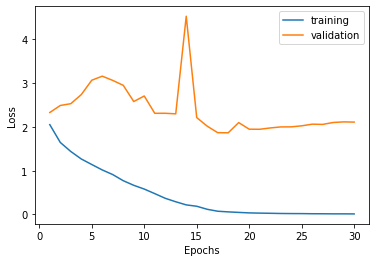

In [11]:
plot_training(results)

In [12]:
# モデルの評価
print("# test samples: ", len((Xtest)))
score = solo_model.evaluate(Xtest, Ytest, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# test samples:  10000
Test loss: 1.9795080423355103
Test accuracy: 0.4611999988555908


# FL on Image Classification

## データ準備

In [13]:
def data_loader(dataset):
  if dataset == "MNIST":
    # MNISTデータの読み込み
    (Xtrain, Ytrain), (Xtest, Ytest) = mnist.load_data()

    #正規化
    Xtrain = np.expand_dims(Xtrain, 3) / 255.
    Xtest = np.expand_dims(Xtest, 3) / 255.
  else:
    #CIFAR10　データセットの読み込み
    (Xtrain, Ytrain), (Xtest, Ytest) = cifar10.load_data()

    #正規化(値を0-1の範囲にスケール)
    Xtrain = Xtrain/ 255.
    Xtest = Xtest/ 255.

  Ytrain = to_categorical(Ytrain)
  Ytest = to_categorical(Ytest)

  #ラベルごとにソートしたデータセットを生成（non-iidデータ生成用）
  ytrain = np.argmax(Ytrain, axis=1)
  sorted_Xtrain = [Xtrain[ytrain == i] for i in np.unique(ytrain)]
  sorted_Ytrain = [Ytrain[ytrain == i] for i in np.unique(ytrain)]

  return Xtrain, Ytrain, sorted_Xtrain, sorted_Ytrain, Xtest, Ytest

## FL implementations


### Clientの実装

In [1]:
import random

class Client:
  def __init__(self, num_label, num_data, E, B, sorted_Xtrain, sorted_Ytrain):
    self.Xtrain = []
    self.Ytrain = []
    self.num_label = num_label
    self.num_data = num_data
    self.datasize_label = int(num_data/num_label)
    self.E = E
    self.B = B
    self.gen_dataset(sorted_Xtrain, sorted_Ytrain)

  def gen_dataset(self, sorted_Xtrain, sorted_Ytrain):
    # Generate client dataset from given dataset, sorted_Xtrain and sorted_Ytrain

    #設定された数だけクラスを指定
    selected_label = random.sample(range(0,10), self.num_label)

    #指定されたクラスからデータをランダムサンプリング
    for i in selected_label:
      permuted_id = np.random.permutation(len(sorted_Xtrain[i]))
      self.Xtrain.append((sorted_Xtrain[i][permuted_id])[:self.datasize_label])
      self.Ytrain.append((sorted_Ytrain[i][permuted_id])[:self.datasize_label])
    self.Xtrain = np.concatenate(self.Xtrain)
    self.Ytrain = np.concatenate(self.Ytrain)

    #クラスでソートされてしまっているので、訓練データをシャッフル
    permuted_id = np.random.permutation(len(self.Xtrain))
    self.Xtrain = self.Xtrain[permuted_id]
    self.Ytrain = self.Ytrain[permuted_id]

  def update_local_model(self, model):
    #Client updates local model with her dateset
    train_results = model.fit(self.Xtrain, self.Ytrain, epochs=self.E, batch_size=B, validation_split=0.20, verbose=0)
    self.model = model
    self.train_results = train_results
    return model.get_weights()

### サーバ機能の実装
今回はクラスは用意せずに実装

In [15]:
# グローバルモデルをクローンし、コンパイルする。weightsはコピーされないことに注意
def copy_global_model(global_model, optimizer, loss, metrics):
  model = clone_model(global_model)
  model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
  return model

In [16]:
# モデルのAggregation
def aggregate_weights(weight_list, num_clients):
    n_layers = len(weight_list[0])
    new_weight = []
    for i in range(n_layers):
        new_weight.append(np.sum([w[i] for w in weight_list], axis=0) / num_clients)

    return new_weight

In [17]:
def federated_learning(global_model, client_set, Xtest, Ytest, num_round=30, optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']):
  #FL
  N = len(client_set)
  local_epochs = client_set[0].E
  local_performance = np.zeros((2, 2, num_round))
  global_performance = np.zeros((2, num_round))
  local_train_loss = np.zeros((2,2, num_round*local_epochs))

  temp_model = copy_global_model(global_model, optimizer, loss, metrics)
  for i in tqdm(range(1, num_round+1)):
    print("Round ", i, "...")
    local_models = []
    print("=== Client update ===")
    for (j, client) in enumerate(tqdm(client_set)):
      temp_model.set_weights(global_model.get_weights())
      local_models.append(client.update_local_model(temp_model))
      if j < 2:
        st_index = int((i-1)*local_epochs)
        end_index = int(i*local_epochs)
        local_train_loss[j, 0, st_index:end_index] = client.train_results.history['loss']
        local_train_loss[j, 1, st_index:end_index] = client.train_results.history['val_loss']
        score = client.model.evaluate(Xtest, Ytest, verbose=0)
        local_performance[j, 0, i-1] = score[0]
        local_performance[j, 1, i-1] = score[1]
        #print('Client test loss:', score[0])
        #print('Client test accuracy:', score[1])

    print("=== Global model ===")
    new_weight = aggregate_weights(local_models, N)
    global_model.set_weights(new_weight)
    
    score = global_model.evaluate(Xtest, Ytest, verbose=0)
    global_performance[0, i-1] = score[0]
    global_performance[1, i-1] = score[1]
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

  return global_model, local_performance, global_performance, local_train_loss

比較対象として、単独での学習も実装しておく

In [18]:
def solo_training(client, global_model, B, Xtest, Ytest, num_epoch=100, optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']):
  #A client trains model solely.
  local_model = copy_global_model(global_model, optimizer, loss, metrics)
  results = local_model.fit(client.Xtrain, client.Ytrain, epochs=num_epoch, batch_size=B, validation_split=0.20, verbose=0)
  plot_training(results)

  return local_model

## FL experiments

### IID dataset

In [19]:
Xtrain, Ytrain, sorted_Xtrain, sorted_Ytrain, Xtest, Ytest = data_loader("CIFAR10")#cipher10に変更した
in_shape = Xtrain.shape[1:]
out_dims = Ytrain.shape[-1]

In [20]:
#ハイパーパラメータの設定
N = 30 #Clientの数
E = 5 #Clientでのエポック数
B = 50 #Clientでのバッチサイズ
num_label = 10 #Clientのもつラベルの種類
num_round = 10 #FL round数
num_data = 40000 #Clientの持つデータの総数
#Clientを生成
client_set = [Client(num_label, num_data, E, B, sorted_Xtrain, sorted_Ytrain) for k in range(N)]

#Global modelの生成
global_model = big_cnn(in_shape, out_dims)
global_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
batch_normalization_8 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
activation_8 (Activation)    (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
batch_normalization_9 (Batch (None, 13, 13, 64)       

### Modelのデータサイズと訓練データの確認


In [21]:
global_model.save_weights('./FLmodel000')
%ls -lh

 ドライブ C のボリューム ラベルは Windows です
 ボリューム シリアル番号は 5C36-C7F8 です

 C:\Users\User\Desktop\FL のディレクトリ



ファイルが見つかりません


In [22]:
client_set[0].Xtrain.shape

(40000, 32, 32, 3)

In [23]:
print("ラベルごとのデータ数")
entire_data = np.zeros((10))
for (i, client) in enumerate(client_set):
  entire_data += client.Ytrain.sum(axis=0)
  print("Client", i+1, client.Ytrain.sum(axis=0))
print("ラベルごとの合計データ数", entire_data)

ラベルごとのデータ数
Client 1 [4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000.]
Client 2 [4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000.]
Client 3 [4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000.]
Client 4 [4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000.]
Client 5 [4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000.]
Client 6 [4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000.]
Client 7 [4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000.]
Client 8 [4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000.]
Client 9 [4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000.]
Client 10 [4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000.]
Client 11 [4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000.]
Client 12 [4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000.]
Client 13 [4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000.]
Client 14 [4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000. 400

### 訓練の実行

===== Solo training =====


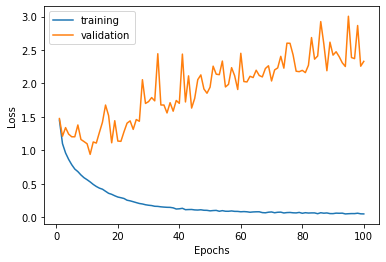

313/313 [==============================] - 3s 9ms/step - loss: 2.2307 - accuracy: 0.6819
Test loss: 2.2306549549102783
Test accuracy: 0.6819000244140625


In [24]:
# 単一のClientのみでモデル訓練
print("===== Solo training =====")
local_model = solo_training(client_set[0], global_model, B, Xtest, Ytest)

# モデルの評価
score = local_model.evaluate(Xtest, Ytest, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


In [25]:
print("===== Federated Learning =====")
global_model, local_performance, global_performance, local_train_loss = federated_learning(global_model, client_set, Xtest, Ytest, num_round)

===== Federated Learning =====


  0%|          | 0/10 [00:00<?, ?it/s]

Round  1 ...
=== Client update ===


  0%|          | 0/30 [00:00<?, ?it/s]

MemoryError: Unable to allocate 375. MiB for an array with shape (32000, 32, 32, 3) and data type float32

In [ ]:
def plot_FL(global_performance, local_performance, local_train_loss):
  print("=== Local loss at Client 1 ===")
  n_epochs = len(local_train_loss[0,0,:])
  plt.plot(range(1, n_epochs+1), local_train_loss[0,0,:], label="Train loss")
  plt.plot(range(1, n_epochs+1), local_train_loss[0,1,:], label="Validation loss")
  plt.xlabel('Local epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  print("=== Global and Local (Client 1) Test Loss ===")
  n_rounds = len(global_performance[0,:])
  plt.plot(range(1, n_rounds+1), global_performance[0, :], label="Global")
  plt.plot(range(1, n_rounds+1), local_performance[0, 0, :], label="Local")
  plt.xlabel('Rounds')
  plt.ylabel('Test loss')
  plt.legend()
  plt.show()

  print("=== Global and Local (Client 1) Test Accuracy ===")
  plt.plot(range(1, n_rounds+1), global_performance[1,:], label="Global")
  plt.plot(range(1, n_rounds+1), local_performance[0,1,:], label="Local")
  plt.xlabel('Rounds')
  plt.ylabel('Test accuracy')
  plt.legend()
  plt.show()


In [ ]:
plot_FL(global_performance, local_performance, local_train_loss)

### non-IID dataset

In [37]:
# 各Clientが一部（5割）のラベルのデータしかもたない場合

Datasetの読み込み
Xtrain, Ytrain, sorted_Xtrain, sorted_Ytrain, Xtest, Ytest = data_loader("CIFAR10")
in_shape = Xtrain.shape[1:]
out_dims = Ytrain.shape[-1]

#ハイパーパラメータの設定
N = 5 #Clientの数
E = 5 #Clientでのエポック数
B = 50 #Clientでのバッチサイズ
num_round = 20
num_label = 5 #Clientのもつラベルの種類 (num_label / 10)
#Clientを生成
client_set = [Client(num_label, 500, E, B, sorted_Xtrain, sorted_Ytrain) for k in range(N)]

print("ラベルごとのデータ数")
entire_data = np.zeros((10))
print(client_set)
for (i, client) in enumerate(client_set):
    print(type(client.Ytrain))
    entire_data += client.Ytrain.sum(axis=0)
    print("Client", i+1, client.Ytrain.sum(axis=0))
print("ラベルごとの合計データ数", entire_data)

ラベルごとのデータ数
[<__main__.Client object at 0x00000279CC781BB0>, <__main__.Client object at 0x00000279C9D850D0>, <__main__.Client object at 0x00000279C0750A90>, <__main__.Client object at 0x00000279C73A7910>, <__main__.Client object at 0x00000279C9D85DC0>]
<class 'numpy.ndarray'>
Client 1 [  0. 100.   0. 100. 100.   0.   0. 100. 100.   0.]
<class 'numpy.ndarray'>
Client 2 [100. 100. 100.   0.   0.   0. 100.   0.   0. 100.]
<class 'numpy.ndarray'>
Client 3 [  0. 100. 100. 100.   0. 100.   0. 100.   0.   0.]
<class 'numpy.ndarray'>
Client 4 [  0. 100. 100.   0. 100. 100.   0.   0. 100.   0.]
<class 'numpy.ndarray'>
Client 5 [  0. 100.   0. 100.   0. 100. 100. 100.   0.   0.]
ラベルごとの合計データ数 [100. 500. 300. 300. 200. 300. 200. 300. 200. 100.]


===== Solo training =====


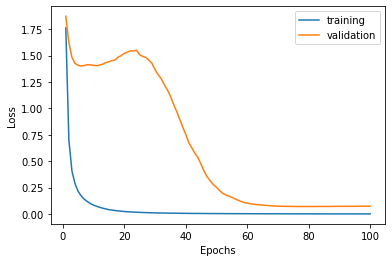

313/313 [==============================] - 1s 4ms/step - loss: 5.0755 - accuracy: 0.4912
Test loss: 5.075494289398193
Test accuracy: 0.4912000000476837


In [30]:
#Global modelの生成
global_model = small_cnn(in_shape, out_dims)

# 単一のClientのみでモデル訓練
print("===== Solo training =====")
local_model = solo_training(client_set[0], global_model, B, Xtest, Ytest)
score = local_model.evaluate(Xtest, Ytest, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [31]:
print("\n===== Federated Learning =====")
global_model, local_performance, global_performance, local_train_loss = federated_learning(global_model, client_set, Xtest, Ytest, num_round)


===== Federated Learning =====


  0%|          | 0/20 [00:00<?, ?it/s]

Round  1 ...
=== Client update ===


  0%|          | 0/5 [00:00<?, ?it/s]

=== Global model ===
Test loss: 2.1162567138671875
Test accuracy: 0.22020000219345093
Round  2 ...
=== Client update ===


  0%|          | 0/5 [00:00<?, ?it/s]

=== Global model ===
Test loss: 2.199713945388794
Test accuracy: 0.15440000593662262
Round  3 ...
=== Client update ===


  0%|          | 0/5 [00:00<?, ?it/s]

=== Global model ===
Test loss: 2.319815158843994
Test accuracy: 0.11810000240802765
Round  4 ...
=== Client update ===


  0%|          | 0/5 [00:00<?, ?it/s]

=== Global model ===
Test loss: 2.380070686340332
Test accuracy: 0.11640000343322754
Round  5 ...
=== Client update ===


  0%|          | 0/5 [00:00<?, ?it/s]

=== Global model ===
Test loss: 2.310145616531372
Test accuracy: 0.148499995470047
Round  6 ...
=== Client update ===


  0%|          | 0/5 [00:00<?, ?it/s]

=== Global model ===
Test loss: 2.109405755996704
Test accuracy: 0.2492000013589859
Round  7 ...
=== Client update ===


  0%|          | 0/5 [00:00<?, ?it/s]

=== Global model ===
Test loss: 1.8132351636886597
Test accuracy: 0.3878999948501587
Round  8 ...
=== Client update ===


  0%|          | 0/5 [00:00<?, ?it/s]

=== Global model ===
Test loss: 1.428772211074829
Test accuracy: 0.5504000186920166
Round  9 ...
=== Client update ===


  0%|          | 0/5 [00:00<?, ?it/s]

=== Global model ===
Test loss: 1.1009035110473633
Test accuracy: 0.6531000137329102
Round  10 ...
=== Client update ===


  0%|          | 0/5 [00:00<?, ?it/s]

=== Global model ===
Test loss: 0.7745508551597595
Test accuracy: 0.7645999789237976
Round  11 ...
=== Client update ===


  0%|          | 0/5 [00:00<?, ?it/s]

=== Global model ===
Test loss: 0.5461589097976685
Test accuracy: 0.838699996471405
Round  12 ...
=== Client update ===


  0%|          | 0/5 [00:00<?, ?it/s]

=== Global model ===
Test loss: 0.386604368686676
Test accuracy: 0.8881999850273132
Round  13 ...
=== Client update ===


  0%|          | 0/5 [00:00<?, ?it/s]

=== Global model ===
Test loss: 0.3082598149776459
Test accuracy: 0.9075000286102295
Round  14 ...
=== Client update ===


  0%|          | 0/5 [00:00<?, ?it/s]

=== Global model ===
Test loss: 0.26063379645347595
Test accuracy: 0.9176999926567078
Round  15 ...
=== Client update ===


  0%|          | 0/5 [00:00<?, ?it/s]

=== Global model ===
Test loss: 0.2354421317577362
Test accuracy: 0.9258000254631042
Round  16 ...
=== Client update ===


  0%|          | 0/5 [00:00<?, ?it/s]

=== Global model ===
Test loss: 0.21511507034301758
Test accuracy: 0.9319999814033508
Round  17 ...
=== Client update ===


  0%|          | 0/5 [00:00<?, ?it/s]

=== Global model ===
Test loss: 0.2027532160282135
Test accuracy: 0.9359999895095825
Round  18 ...
=== Client update ===


  0%|          | 0/5 [00:00<?, ?it/s]

=== Global model ===
Test loss: 0.1923549771308899
Test accuracy: 0.9405999779701233
Round  19 ...
=== Client update ===


  0%|          | 0/5 [00:00<?, ?it/s]

=== Global model ===
Test loss: 0.1887199878692627
Test accuracy: 0.9406999945640564
Round  20 ...
=== Client update ===


  0%|          | 0/5 [00:00<?, ?it/s]

=== Global model ===
Test loss: 0.1888536512851715
Test accuracy: 0.9412999749183655




=== Local loss at Client 1 ===


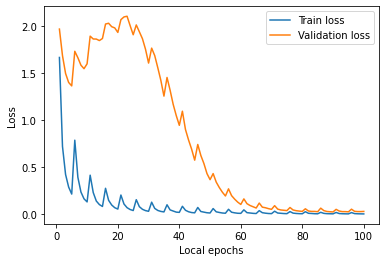

=== Global and Local (Client 1) Test Loss ===


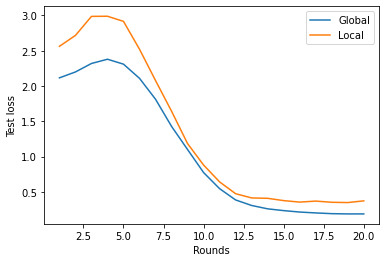

=== Global and Local (Client 1) Test Accuracy ===


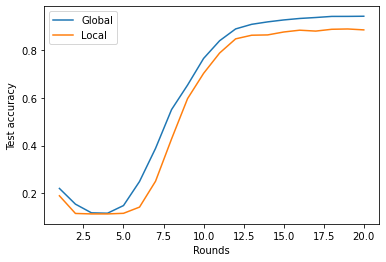

In [32]:
print("\n")
plot_FL(global_performance, local_performance, local_train_loss)

In [33]:
# 各Clientが極一部のラベル（2種類）のデータしかもたない、かつ、Client数が不足する場合

#Datasetの読み込み
#Xtrain, Ytrain, sorted_Xtrain, sorted_Ytrain, Xtest, Ytest = data_loader("MNIST")
#in_shape = Xtrain.shape[1:]
#out_dims = Ytrain.shape[-1]

#ハイパーパラメータの設定
N = 3 #Clientの数
E = 5 #Clientでのエポック数
B = 50 #Clientでのバッチサイズ
num_round = 20
num_label = 2 #Clientのもつラベルの種類 (num_label / 10)
#Clientを生成
client_set = [Client(num_label, 500, E, B, sorted_Xtrain, sorted_Ytrain) for k in range(N)]

print("ラベルごとのデータ数")
entire_data = np.zeros((10))
for (i, client) in enumerate(client_set):
  entire_data += client.Ytrain.sum(axis=0)
  print("Client", i+1, client.Ytrain.sum(axis=0))
print("ラベルごとの合計データ数", entire_data)

ラベルごとのデータ数
Client 1 [  0.   0. 250.   0.   0.   0.   0. 250.   0.   0.]
Client 2 [  0.   0.   0. 250.   0.   0. 250.   0.   0.   0.]
Client 3 [  0.   0.   0.   0. 250.   0. 250.   0.   0.   0.]
ラベルごとの合計データ数 [  0.   0. 250. 250. 250.   0. 500. 250.   0.   0.]


===== Solo training =====


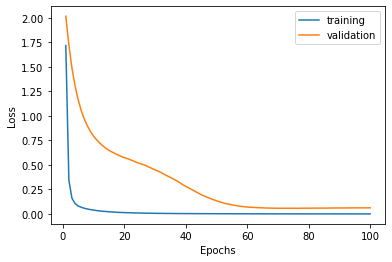

313/313 [==============================] - 1s 4ms/step - loss: 9.5413 - accuracy: 0.2011
Test loss: 9.54133129119873
Test accuracy: 0.20110000669956207

===== Federated Learning =====


  0%|          | 0/20 [00:00<?, ?it/s]

Round  1 ...
=== Client update ===


  0%|          | 0/3 [00:00<?, ?it/s]

=== Global model ===
Test loss: 2.3621249198913574
Test accuracy: 0.14569999277591705
Round  2 ...
=== Client update ===


  0%|          | 0/3 [00:00<?, ?it/s]

=== Global model ===
Test loss: 2.431635856628418
Test accuracy: 0.2565000057220459
Round  3 ...
=== Client update ===


  0%|          | 0/3 [00:00<?, ?it/s]

=== Global model ===
Test loss: 2.4783055782318115
Test accuracy: 0.3131999969482422
Round  4 ...
=== Client update ===


  0%|          | 0/3 [00:00<?, ?it/s]

=== Global model ===
Test loss: 2.459129810333252
Test accuracy: 0.34369999170303345
Round  5 ...
=== Client update ===


  0%|          | 0/3 [00:00<?, ?it/s]

=== Global model ===
Test loss: 2.450507640838623
Test accuracy: 0.385699987411499
Round  6 ...
=== Client update ===


  0%|          | 0/3 [00:00<?, ?it/s]

=== Global model ===
Test loss: 2.3874025344848633
Test accuracy: 0.4259999990463257
Round  7 ...
=== Client update ===


  0%|          | 0/3 [00:00<?, ?it/s]

=== Global model ===
Test loss: 2.4156761169433594
Test accuracy: 0.42010000348091125
Round  8 ...
=== Client update ===


  0%|          | 0/3 [00:00<?, ?it/s]

=== Global model ===
Test loss: 2.426088333129883
Test accuracy: 0.4593000113964081
Round  9 ...
=== Client update ===


  0%|          | 0/3 [00:00<?, ?it/s]

=== Global model ===
Test loss: 2.596961736679077
Test accuracy: 0.4458000063896179
Round  10 ...
=== Client update ===


  0%|          | 0/3 [00:00<?, ?it/s]

=== Global model ===
Test loss: 2.769451856613159
Test accuracy: 0.4740999937057495
Round  11 ...
=== Client update ===


  0%|          | 0/3 [00:00<?, ?it/s]

=== Global model ===
Test loss: 3.137180805206299
Test accuracy: 0.4611999988555908
Round  12 ...
=== Client update ===


  0%|          | 0/3 [00:00<?, ?it/s]

=== Global model ===
Test loss: 3.377056360244751
Test accuracy: 0.4796999990940094
Round  13 ...
=== Client update ===


  0%|          | 0/3 [00:00<?, ?it/s]

=== Global model ===
Test loss: 3.7063868045806885
Test accuracy: 0.474700003862381
Round  14 ...
=== Client update ===


  0%|          | 0/3 [00:00<?, ?it/s]

=== Global model ===
Test loss: 3.9233198165893555
Test accuracy: 0.4814000129699707
Round  15 ...
=== Client update ===


  0%|          | 0/3 [00:00<?, ?it/s]

=== Global model ===
Test loss: 4.2508745193481445
Test accuracy: 0.477400004863739
Round  16 ...
=== Client update ===


  0%|          | 0/3 [00:00<?, ?it/s]

=== Global model ===
Test loss: 4.435912609100342
Test accuracy: 0.48260000348091125
Round  17 ...
=== Client update ===


  0%|          | 0/3 [00:00<?, ?it/s]

=== Global model ===
Test loss: 4.69729471206665
Test accuracy: 0.4797999858856201
Round  18 ...
=== Client update ===


  0%|          | 0/3 [00:00<?, ?it/s]

=== Global model ===
Test loss: 4.806596755981445
Test accuracy: 0.4830999970436096
Round  19 ...
=== Client update ===


  0%|          | 0/3 [00:00<?, ?it/s]

=== Global model ===
Test loss: 4.926835060119629
Test accuracy: 0.4812000095844269
Round  20 ...
=== Client update ===


  0%|          | 0/3 [00:00<?, ?it/s]

=== Global model ===
Test loss: 4.996978759765625
Test accuracy: 0.48420000076293945


=== Local loss at Client 1 ===


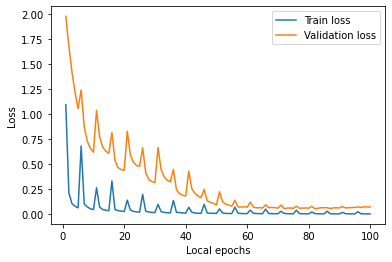

=== Global and Local (Client 1) Test Loss ===


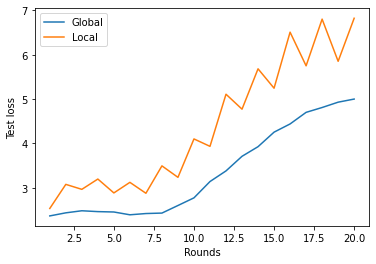

=== Global and Local (Client 1) Test Accuracy ===


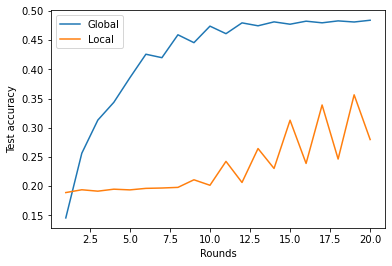

In [34]:
#Global modelの生成
global_model = tiny_cnn(in_shape, out_dims)

# 単一のClientのみでモデル訓練
print("===== Solo training =====")
local_model = solo_training(client_set[0], global_model, B, Xtest, Ytest)
score = local_model.evaluate(Xtest, Ytest, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("\n===== Federated Learning =====")
global_model, local_performance, global_performance, local_train_loss = federated_learning(global_model, client_set, Xtest, Ytest, num_round)

print("\n")
plot_FL(global_performance, local_performance, local_train_loss)

In [35]:
# 各Clientが極一部のラベルのデータしかもたない、かつ、Client数が多い場合

#Datasetの読み込み
Xtrain, Ytrain, sorted_Xtrain, sorted_Ytrain, Xtest, Ytest = data_loader("MNIST")
in_shape = Xtrain.shape[1:]
out_dims = Ytrain.shape[-1]

#ハイパーパラメータの設定
N = 10 #Clientの数
E = 5 #Clientでのエポック数
B = 50 #Clientでのバッチサイズ
num_round = 20
num_label = 2 #Clientのもつラベルの種類 (num_label / 10)
#Clientを生成
client_set = [Client(num_label, 500, E, B, sorted_Xtrain, sorted_Ytrain) for k in range(N)]

print("ラベルごとのデータ数")
entire_data = np.zeros((10))
for (i, client) in enumerate(client_set):
  entire_data += client.Ytrain.sum(axis=0)
  print("Client", i+1, client.Ytrain.sum(axis=0))
print("ラベルごとの合計データ数", entire_data)


ラベルごとのデータ数
Client 1 [250.   0.   0.   0.   0.   0.   0.   0.   0. 250.]
Client 2 [  0.   0.   0.   0.   0.   0. 250.   0.   0. 250.]
Client 3 [  0.   0.   0.   0. 250.   0.   0. 250.   0.   0.]
Client 4 [  0. 250.   0.   0. 250.   0.   0.   0.   0.   0.]
Client 5 [  0.   0. 250.   0.   0.   0.   0. 250.   0.   0.]
Client 6 [  0. 250.   0. 250.   0.   0.   0.   0.   0.   0.]
Client 7 [  0.   0.   0.   0. 250.   0.   0.   0. 250.   0.]
Client 8 [250.   0.   0.   0.   0.   0.   0.   0.   0. 250.]
Client 9 [  0.   0.   0.   0. 250.   0.   0. 250.   0.   0.]
Client 10 [  0.   0.   0. 250.   0. 250.   0.   0.   0.   0.]
ラベルごとの合計データ数 [ 500.  500.  250.  500. 1000.  250.  250.  750.  250.  750.]


===== Solo training =====


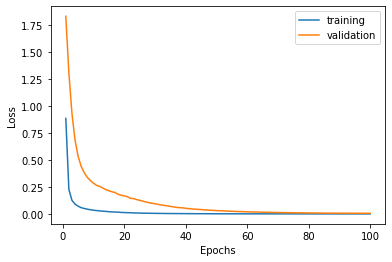

313/313 [==============================] - 1s 4ms/step - loss: 9.7784 - accuracy: 0.1970
Test loss: 9.778380393981934
Test accuracy: 0.19699999690055847

===== Federated Learning =====


  0%|          | 0/20 [00:00<?, ?it/s]

Round  1 ...
=== Client update ===


  0%|          | 0/10 [00:00<?, ?it/s]

=== Global model ===
Test loss: 2.2544782161712646
Test accuracy: 0.1468999981880188
Round  2 ...
=== Client update ===


  0%|          | 0/10 [00:00<?, ?it/s]

=== Global model ===
Test loss: 2.0959420204162598
Test accuracy: 0.40400001406669617
Round  3 ...
=== Client update ===


  0%|          | 0/10 [00:00<?, ?it/s]

=== Global model ===
Test loss: 1.9497406482696533
Test accuracy: 0.4359000027179718
Round  4 ...
=== Client update ===


  0%|          | 0/10 [00:00<?, ?it/s]

=== Global model ===
Test loss: 1.7954328060150146
Test accuracy: 0.5583000183105469
Round  5 ...
=== Client update ===


  0%|          | 0/10 [00:00<?, ?it/s]

=== Global model ===
Test loss: 1.6241614818572998
Test accuracy: 0.6057000160217285
Round  6 ...
=== Client update ===


  0%|          | 0/10 [00:00<?, ?it/s]

=== Global model ===
Test loss: 1.4681857824325562
Test accuracy: 0.6427000164985657
Round  7 ...
=== Client update ===


  0%|          | 0/10 [00:00<?, ?it/s]

=== Global model ===
Test loss: 1.2719950675964355
Test accuracy: 0.6983000040054321
Round  8 ...
=== Client update ===


  0%|          | 0/10 [00:00<?, ?it/s]

=== Global model ===
Test loss: 1.1341419219970703
Test accuracy: 0.7044000029563904
Round  9 ...
=== Client update ===


  0%|          | 0/10 [00:00<?, ?it/s]

=== Global model ===
Test loss: 0.9311617016792297
Test accuracy: 0.746999979019165
Round  10 ...
=== Client update ===


  0%|          | 0/10 [00:00<?, ?it/s]

=== Global model ===
Test loss: 0.8361276388168335
Test accuracy: 0.7432000041007996
Round  11 ...
=== Client update ===


  0%|          | 0/10 [00:00<?, ?it/s]

=== Global model ===
Test loss: 0.7146076560020447
Test accuracy: 0.7631999850273132
Round  12 ...
=== Client update ===


  0%|          | 0/10 [00:00<?, ?it/s]

=== Global model ===
Test loss: 0.5823137760162354
Test accuracy: 0.8314999938011169
Round  13 ...
=== Client update ===


  0%|          | 0/10 [00:00<?, ?it/s]

=== Global model ===
Test loss: 0.5025511980056763
Test accuracy: 0.8443999886512756
Round  14 ...
=== Client update ===


  0%|          | 0/10 [00:00<?, ?it/s]

=== Global model ===
Test loss: 0.4262525737285614
Test accuracy: 0.8766000270843506
Round  15 ...
=== Client update ===


  0%|          | 0/10 [00:00<?, ?it/s]

=== Global model ===
Test loss: 0.3912111222743988
Test accuracy: 0.8804000020027161
Round  16 ...
=== Client update ===


  0%|          | 0/10 [00:00<?, ?it/s]

=== Global model ===
Test loss: 0.3411619961261749
Test accuracy: 0.899399995803833
Round  17 ...
=== Client update ===


  0%|          | 0/10 [00:00<?, ?it/s]

=== Global model ===
Test loss: 0.3210744261741638
Test accuracy: 0.9018999934196472
Round  18 ...
=== Client update ===


  0%|          | 0/10 [00:00<?, ?it/s]

=== Global model ===
Test loss: 0.29648375511169434
Test accuracy: 0.9114999771118164
Round  19 ...
=== Client update ===


  0%|          | 0/10 [00:00<?, ?it/s]

=== Global model ===
Test loss: 0.305111289024353
Test accuracy: 0.9035999774932861
Round  20 ...
=== Client update ===


  0%|          | 0/10 [00:00<?, ?it/s]

=== Global model ===
Test loss: 0.27091920375823975
Test accuracy: 0.9172000288963318


=== Local loss at Client 1 ===


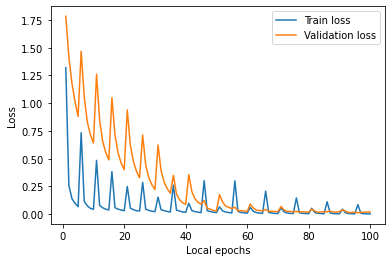

=== Global and Local (Client 1) Test Loss ===


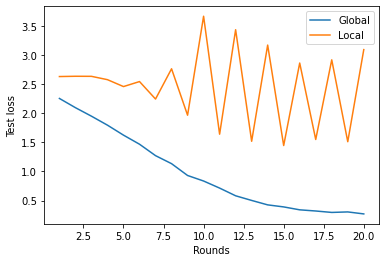

=== Global and Local (Client 1) Test Accuracy ===


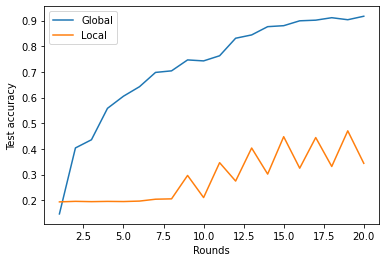

In [36]:
#Global modelの生成
global_model = tiny_cnn(in_shape, out_dims)

# 単一のClientのみでモデル訓練
print("===== Solo training =====")
local_model = solo_training(client_set[0], global_model, B, Xtest, Ytest)
score = local_model.evaluate(Xtest, Ytest, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("\n===== Federated Learning =====")
global_model, local_performance, global_performance, local_train_loss = federated_learning(global_model, client_set, Xtest, Ytest, num_round)

print("\n")
plot_FL(global_performance, local_performance, local_train_loss)